In [51]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

### Intensidad para ventana en tiempo de reloj

In [52]:
#lee los datos con pandas para la sheet_name de excel indicado
df_nucleo=pd.read_excel('Datos 6 de agosto 2022.xlsx',sheet_name='UCSC')

In [53]:
#genera el dataframe sobre la base de las fechas
df_nucleo['fe']=pd.to_datetime(df_nucleo['Fecha y Hora'])

#entrega un nuevo formato por minuto a los datos y escribe una nueva columna
df_nucleo['fecha_hora_min']=pd.to_datetime(df_nucleo.fe.dt.strftime('%m/%d/%Y %H:%M'))

#agrupa los datos por minuto
df_g=df_nucleo.groupby(by='fecha_hora_min').sum()

In [54]:
# Agrupar los datos en intervalos de 15, 30 y 60 minutos y suma los valores de cada grupo

df_5min = df_g.resample('5T').sum()
df_10min = df_g.resample('10T').sum()
df_15min = df_g.resample('15T').sum()
df_30min = df_g.resample('30T' ).sum()
df_60min = df_g.resample('60T').sum()

In [55]:
#Intesidad maxima

df_60min = df_g.resample('60T').sum()/60
df_30min = df_g.resample('30T').sum()/30
df_15min = df_g.resample('15T').sum()/15
df_10min = df_g.resample('10T' ).sum()/10
df_5min = df_g.resample('5T').sum()/5


#print(np.round(df_60min.max(),3))
#print(np.round(df_30min.max(),3))
#print(np.round(df_15min.max(),3))
#print(np.round(df_10min.max(),3))
#print(np.round(df_5min.max(),3))


### Intensidad para ventana móvil

In [56]:
#lee los datos con pandas para la sheet_name de excel indicado
df_nucleo0=pd.read_excel('Datos 6 de agosto 2022.xlsx',sheet_name='UCSC')

In [57]:
#genera el dataframe sobre la base de las fechas
df_nucleo0['fe']=pd.to_datetime(df_nucleo0['Fecha y Hora'])

#entrega un nuevo formato por minuto a los datos y escribe una nueva columna
df_nucleo0['fecha_hora_min']=pd.to_datetime(df_nucleo0.fe.dt.strftime('%m/%d/%Y %H:%M'))

#agrupa los datos por minuto
df_g0=df_nucleo0.groupby(by='fecha_hora_min').sum()

In [58]:
#genera filas para cada minuto del rango de datos
r = pd.date_range(start=df_g0.index.min(),end=df_g0.index.max(),freq='min')

#asigna una pp nula a las fechas (minutos) ingresados y reordena incluyendo las fechas con datos
df_g0=df_g0.reindex(r).fillna(0.0)

#entrega el nuevo tamaño del archivo (filas, columnas)
#df_g.to_excel('tormento.xlsx')

In [59]:
#define el rango de filas en las que se agregan los datos
#en este caso '%d/%m/%y %H:%M' cada fila corresponde a un minuto
#puesto se han rellenado los tiempos (minutos) faltantes
#Para UCSC los registros estan cada 5 minutos por defecto
# el resto de las estaciones debo pasarlas a minutos por la incertesa que no se sabe cada cuando rato se registraron datos
filas_min0= 60
filas_min1= 30
filas_min2= 15
filas_min3= 10
filas_min4= 5

#suma el numero de filas definidas (minutos) en una ventana movil con paso de 1 minuto (1 fila)
df_x1=df_g0.rolling(filas_min0).sum()
df_x2=df_g0.rolling(filas_min1).sum()
df_x3=df_g0.rolling(filas_min2).sum()
df_x4=df_g0.rolling(filas_min3).sum()
df_x5=df_g0.rolling(filas_min4).sum()

In [60]:
#Intesidad

intensidad1 = df_x1.max()/60
intensidad2 = df_x2.max()/30
intensidad3 = df_x3.max()/15
intensidad4 = df_x4.max()/10
intensidad5 = df_x5.max()/5

#print(intensidad1, 'mm/min')
#print(intensidad2,'mm/min')
#print(intensidad3,'mm/min')
#print(intensidad4, 'mm/min')
#print(intensidad5, 'mm/min')


In [61]:


minutos = np.array([60,30,15,10,5])
ventanafija = np.array([df_60min.max(),df_30min.max(),df_15min.max(),df_10min.max(),df_5min.max()])
ventanamovil = np.array([intensidad1,intensidad2,intensidad3,intensidad4,intensidad5])
Min = minutos.flatten(order='A')
VenFi = ventanafija.flatten(order='A')
VenMo = ventanamovil.flatten(order='A')

venfija = np.round(VenFi,3)
venmovil = np.round(VenMo,3)

In [62]:
Mat = pd.DataFrame({'Minutos': Min,'Ventana Fija': venfija,'Ventana Movil': venmovil})
Mat

,Minutos,Ventana Fija,Ventana Movil
0,60,0.080,0.090
1,30,0.107,0.107
2,15,0.120,0.120
3,10,0.120,0.140
4,5,0.200,0.200


In [63]:

#Venta Movil y fija

Data =  np.array(Mat.iloc[:,[1,2]].values.tolist())
Fija = Data[:,0] 
Movil = Data[:,1]



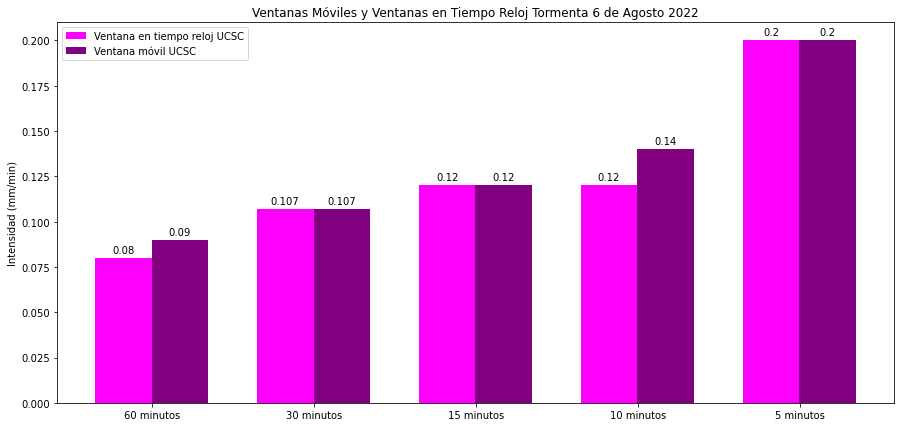

In [64]:
#Eje x debes graficar la fecha en la que ocurren los maximos

# Crear el gráfico
x = np.arange(len(venmovil))
width = 0.35

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, Fija, width, label='Ventana en tiempo reloj UCSC',color= 'magenta')
rects2 = ax.bar(x + width/2, Movil, width, label='Ventana móvil UCSC', color= 'purple')

ax.set_ylabel('Intensidad (mm/min)')
ax.set_title('Ventanas Móviles y Ventanas en Tiempo Reloj Tormenta 6 de Agosto 2022')
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()
#ax.legend(fontsize='9')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento de etiqueta
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
# Mostrar el gráfico
plt.xticks([r+width/100 for r in range(len(venmovil))],
        ['60 minutos', '30 minutos', '15 minutos', '10 minutos', '5 minutos'])
plt.savefig('ventana movilsecuencial  6 de agosto 2022 UCSC.png',dpi=900, transparent = False)

